<a href="https://colab.research.google.com/github/olganikolaeva-hub/neural_networks/blob/main/nn_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Пример построения  двухслойной нейронной сети на numpy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [4]:
#test:
Y = [1, 2, 3, 4, 5]
to_one_hot(Y)

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [7]:
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [31]:
### Шаг 2. Подготовка тренировочных данных
from sklearn import datasets
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target

In [38]:
data = pd.DataFrame(data = X, columns = iris_data.feature_names)
X = normalize(data.values)
X[0]

array([0.80377277, 0.55160877, 0.22064351, 0.0315205 ])

In [39]:
dataframe = pd.DataFrame(data = X, columns = iris_data.feature_names)
dataframe['target'] = y
dataframe.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.803773,0.551609,0.220644,0.031521,0
1,0.828133,0.507020,0.236609,0.033801,0
2,0.805333,0.548312,0.222752,0.034269,0
3,0.800030,0.539151,0.260879,0.034784,0
4,0.790965,0.569495,0.221470,0.031639,0


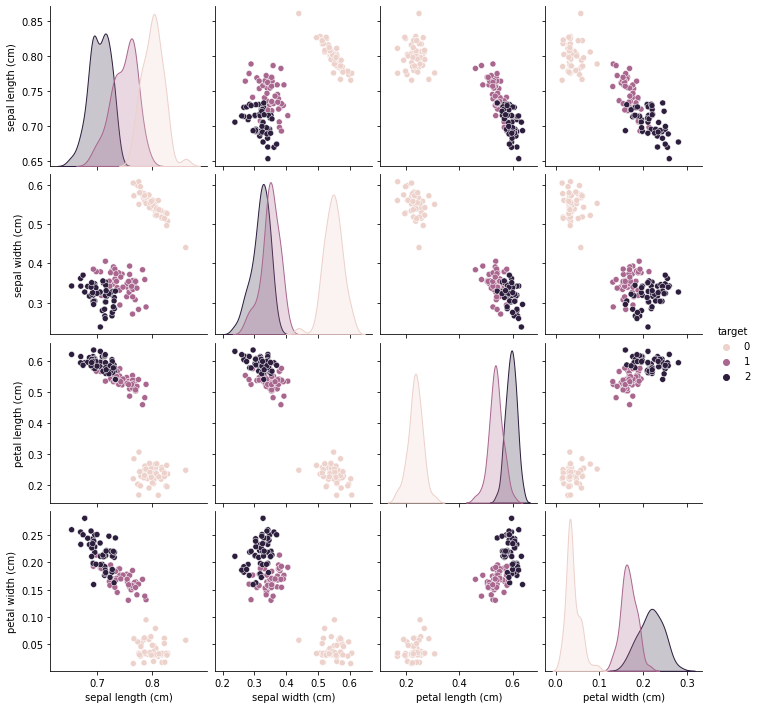

In [37]:
# посмотрим на данные
g = sns.pairplot(dataframe, hue="target")
plt.show()

In [43]:
y = y.flatten()
y = to_one_hot(y)

In [44]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [160]:
### Шаг 3. Обученние нейронной сети
# инициализируем веса случайным образом
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выходов
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

In [161]:
w0

array([[ 0.5665302 , -0.33040717,  0.01820996,  0.69190304,  0.04668976],
       [ 0.32613355, -0.51919918, -0.22627689, -0.29813048, -0.13420459],
       [-0.97766843, -0.7789385 ,  0.75147019, -0.19704235, -0.35561835],
       [-0.19301155, -0.0466244 ,  0.69706745, -0.26974195, -0.87878454]])

In [162]:
w1

array([[-0.50180175, -0.05858161, -0.07686772],
       [ 0.92388793, -0.07510324, -0.48481716],
       [ 0.69797312, -0.87946046, -0.24720282],
       [ 0.38061766,  0.93708899, -0.66221665],
       [ 0.30435452,  0.47373249, -0.95268369]])

In [163]:
# скорость обучения (learning rate)
n = 0.1

In [164]:
# массив для ошибок, чтобы потом построить график
errors = []

In [165]:
# процесс обучения
w1_intermediate = []
w0_intermediate = []
for i in range(2000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    # в качестве loss функции используем среднеквадратичную ошибку прогноза
    layer2_error = (y_train - layer2)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1_intermediate.append(w1)
    w1 += layer1.T.dot(layer2_delta) * n
      
    
    w0_intermediate.append(w0[0][0])
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

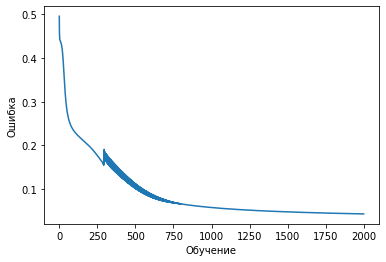

Точность нейронной сети 95.7%


In [166]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")
#Видно, что ошибка после 1500 итераций практически перестает изменяться (изменяется только 4 знак после запятой) и выходит на асимптоту,
#кол-во итераций можно сократить

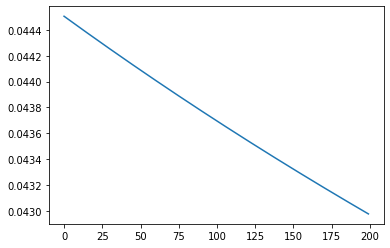

In [167]:
plt.plot(errors[1800:2000])

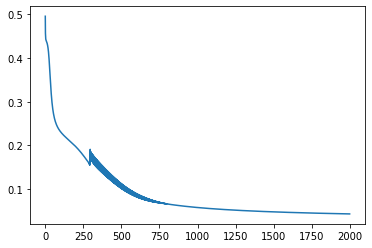

In [168]:
plt.plot(errors)

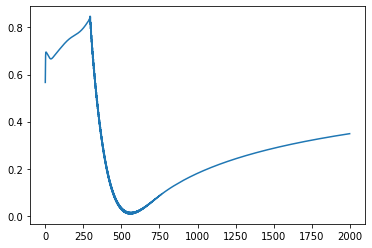

In [169]:
#Посмотрим, как изменялся вес w0 в процессе обучения при переменной sepal length (cm) для 1-го входного слоя: длина w0_intermediate равна кол-ву пройденных итераций
#Изменение веса немонотонно (в отличие от изменения весов в градиентном спуске классических моделей машинного обучения)
plt.plot(w0_intermediate)

In [170]:
len(w0_intermediate)

2000

In [209]:
#Попробуем улучшить модель, изменив технику инициализации весов и добавив функцию softmax
w0 = np.random.random((4, 5)) * np.sqrt(2/5) # для входного слоя   - 4 входа, 5 выходов
w1 = np.random.random((5, 3)) * np.sqrt(2/3) # для внутреннего слоя - 5 входов, 3 выхода
w2 = np.random.random((3, 3)) * np.sqrt(2/3) # для внутреннего слоя - 3 входов, 3 выхода
w0

array([[0.32936494, 0.56357173, 0.53917797, 0.22921103, 0.20167996],
       [0.1373933 , 0.5782618 , 0.5120887 , 0.09636022, 0.47152069],
       [0.18711437, 0.2951999 , 0.51580506, 0.48582856, 0.42834249],
       [0.38313063, 0.43892809, 0.11319741, 0.48887616, 0.52936875]])

In [211]:
w2

array([[0.56711017, 0.58174836, 0.35145002],
       [0.42889584, 0.63854159, 0.63384282],
       [0.034059  , 0.21619008, 0.09170403]])

In [220]:
def softmax(X):
    max_prob = np.max(X, axis=0).reshape((-1, 1))
    X -= max_prob[0]
    np.exp(X, X)
    sum_prob = np.sum(X, axis=0).reshape((-1, 1))
    X /= sum_prob[0]
    return X

def softmax_grad(s):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    #s = s.reshape(-1,1)
    return np.multiply(s, 1 - s)

# скорость обучения (learning rate)
n = 0.1
# массив для ошибок, чтобы потом построить график
errors = []
# процесс обучения
w1_intermediate = []
w0_intermediate = []
w2_intermediate = []

In [221]:
layer0 = X_train
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))
layer3 = softmax(np.dot(layer2, w2))
softmax_grad(layer3).shape

(105, 3)

In [217]:
(y_train - layer3).shape

(105, 3)

In [219]:
y_train.shape

(105, 3)

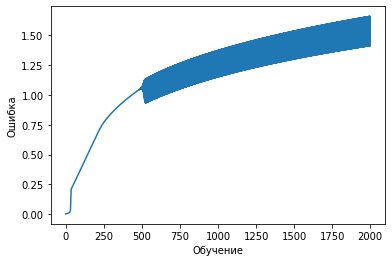

Точность нейронной сети -40.99%


In [222]:
for i in range(2000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = softmax(np.dot(layer2, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    # в качестве loss функции используем среднеквадратичную ошибку прогноза
    layer3_error = (y_train - layer3)
    layer3_delta = layer3_error * softmax_grad(layer3)

    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w2_intermediate.append(w2)
    w2 += layer2.T.dot(layer3_delta) * n
    
    w1_intermediate.append(w1)
    w1 += layer1.T.dot(layer2_delta) * n
      
    w0_intermediate.append(w0[0][0])
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [143]:
#Получилась какая-то ерунда...